In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

In [2]:
np.random.seed(12049)

In [3]:
def get_classes(data_path, classes, data):
    print(f"---- {data} ----")
    knee_severity = {}
    count = 0

    for i in range(len(classes)):
        imgs = os.listdir(os.path.join(data_path, str(i)))
        knee_severity[i] = imgs
        count += len(imgs)

    for k, v in knee_severity.items():
        print(
            f"Grade {k} - {classes[k]}: {len(v)} images, {round((len(v) * 100) / count, 2)}%"
        )

    return knee_severity


def plot_classes(dict_classes, data_path, classes, data):
    for k, v in dict_classes.items():
        print(f"{data} - {classes[k]}")
        plt.figure(figsize=(10, 25))
        for i in range(5):
            img_path = os.path.join(data_path, str(k), v[i])
            img = tf.keras.preprocessing.image.load_img(img_path)
            plt.subplot(1, 5, 1 + i, xticks=[], yticks=[])
            plt.imshow(img)
            plt.title(f"Grade {k}")
        plt.show()

In [4]:
class_names = ['Healthy', 'Doubtful', 'Minimal', 'Moderate', 'Severe']

In [5]:
base_dir ="C:\mini project\dataset"
train_path = os.path.join(base_dir, 'train')
valid_path = os.path.join(base_dir, 'val')
test_path = os.path.join(base_dir, 'test')

In [6]:
train_data = get_classes(train_path, class_names, 'Train')
valid_data = get_classes(valid_path, class_names, 'Valid')
tests_data = get_classes(test_path, class_names, 'Test')

---- Train ----
Grade 0 - Healthy: 2286 images, 39.56%
Grade 1 - Doubtful: 1046 images, 18.1%
Grade 2 - Minimal: 1516 images, 26.24%
Grade 3 - Moderate: 757 images, 13.1%
Grade 4 - Severe: 173 images, 2.99%
---- Valid ----
Grade 0 - Healthy: 328 images, 39.71%
Grade 1 - Doubtful: 153 images, 18.52%
Grade 2 - Minimal: 212 images, 25.67%
Grade 3 - Moderate: 106 images, 12.83%
Grade 4 - Severe: 27 images, 3.27%
---- Test ----
Grade 0 - Healthy: 639 images, 38.59%
Grade 1 - Doubtful: 296 images, 17.87%
Grade 2 - Minimal: 447 images, 26.99%
Grade 3 - Moderate: 223 images, 13.47%
Grade 4 - Severe: 51 images, 3.08%


Train data - Healthy


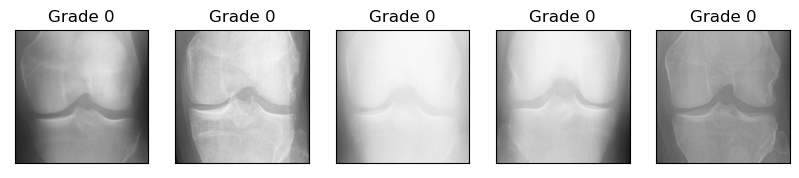

Train data - Doubtful


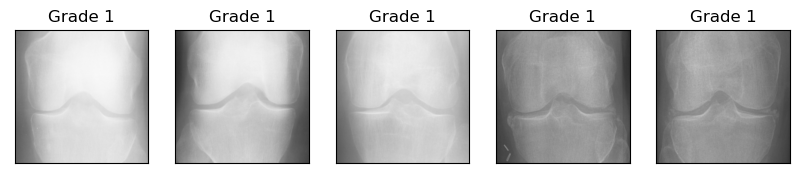

Train data - Minimal


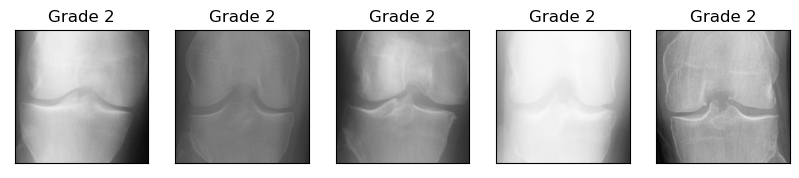

Train data - Moderate


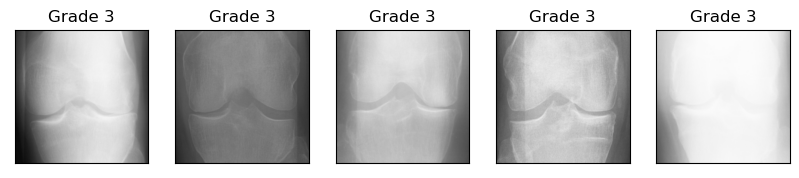

Train data - Severe


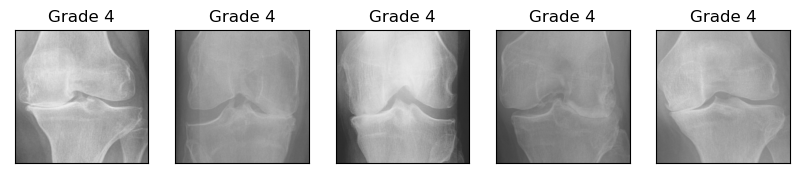

In [7]:
plot_classes(train_data, train_path, class_names, 'Train data')

In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Test data - Healthy


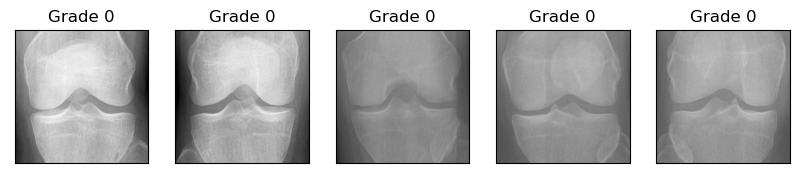

Test data - Doubtful


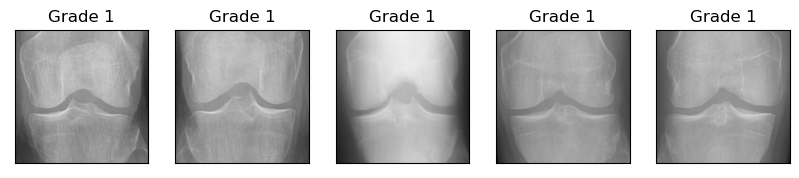

Test data - Minimal


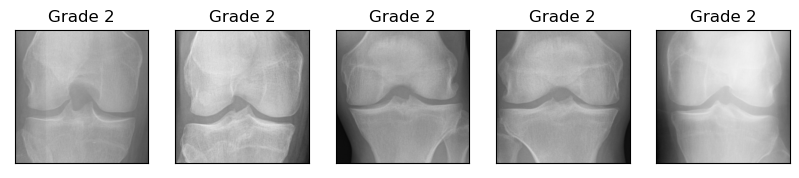

Test data - Moderate


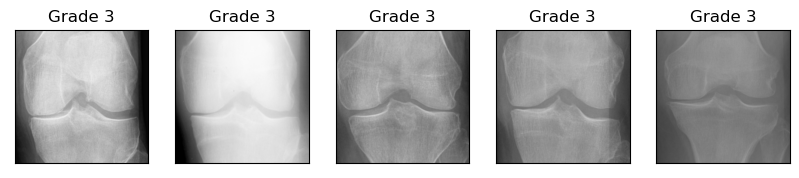

Test data - Severe


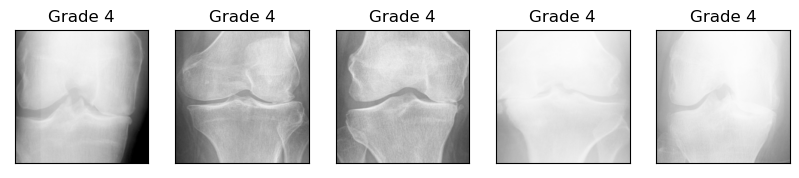

In [10]:
plot_classes(tests_data, test_path, class_names, 'Test data')

Found 5778 images belonging to 5 classes.


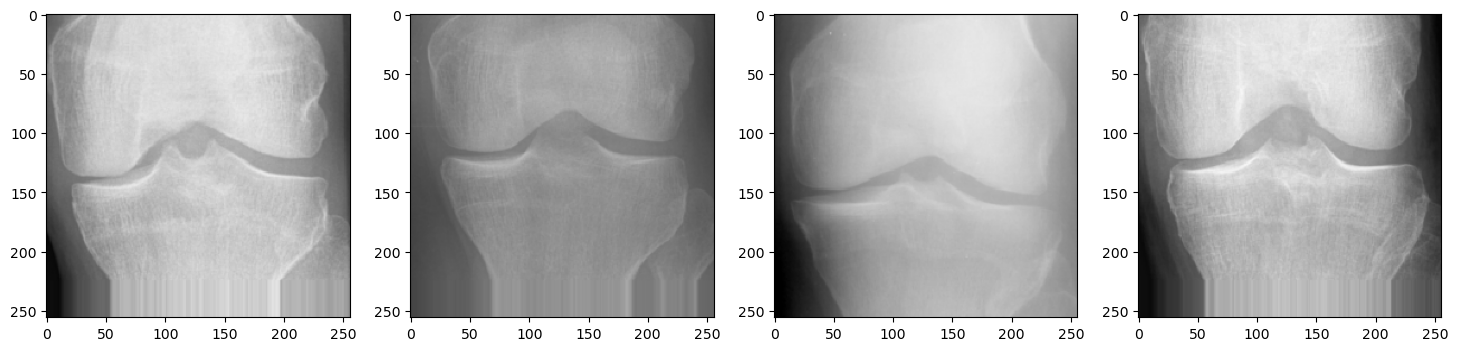

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-50,0,50,30,-30]
)
imagegen = datagen.flow_from_directory(train_path, batch_size=5)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

Found 5778 images belonging to 5 classes.


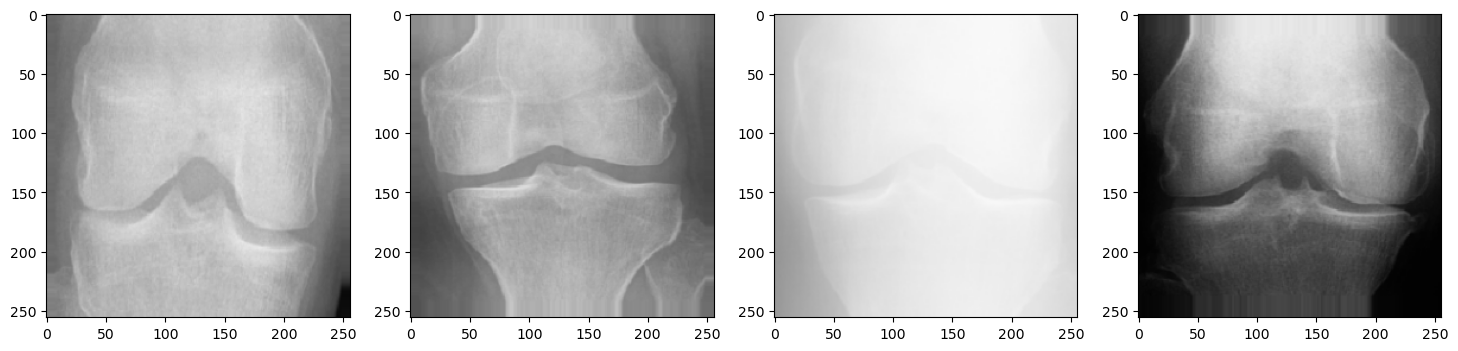

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

Found 5778 images belonging to 5 classes.


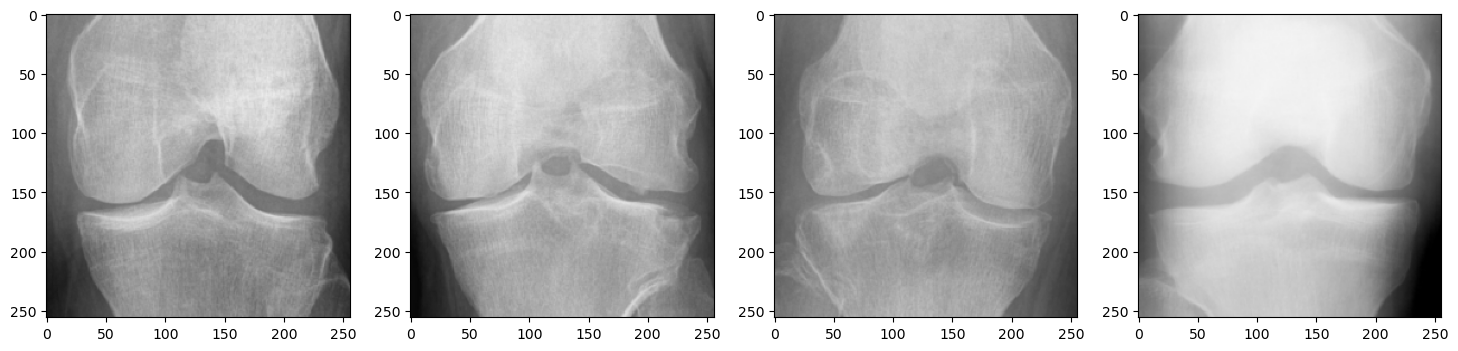

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True
)
imagegen = datagen.flow_from_directory(train_path, batch_size=1)
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(imagegen.next()[0][0].astype('uint8'))
plt.show()

In [17]:
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

In [18]:
target_size = (224, 224)

train_generator = aug_datagen.flow_from_directory(
    train_path, class_mode="categorical", target_size=target_size, shuffle=True
)

valid_generator = noaug_datagen.flow_from_directory(
    valid_path,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False,
)

Found 5778 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [19]:
y_train = train_generator.labels
y_val = valid_generator.labels

In [20]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train ---> ", dict(zip(unique, counts)))

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

Train --->  {0: 2286, 1: 1046, 2: 1516, 3: 757, 4: 173}
{0: 0.5055118110236221, 1: 1.1047801147227534, 2: 0.7622691292875989, 3: 1.5265521796565389, 4: 6.679768786127168}


In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the images
image_dir=cv2.imread("C:\\mini project\\enhanced images\\0_enhanced_image\\9001695L.png")
# image_dir = "C:\\mini project\\WhatsApp Image 2023-12-14 at 16.32.54_67568f63.jpg"
image_files = os.listdir(image_dir)

# Assuming a known scale of millimeters per pixel (replace with actual scale)
scale_mm_per_pixel = 0.1  # Example: 1 pixel = 0.1 mm

# Set a threshold to identify bone space (you may need to adjust this threshold)
threshold = 200

# Set the number of clusters for k-means
num_clusters = 3

# Display images and calculate areas
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply k-means clustering to segment the image
    pixel_values = np.float32(gray.reshape(-1, 1))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(pixel_values, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    segmented = centers[labels.flatten()].reshape(gray.shape)

    # Create binary masks for each segment based on the threshold
    masks = []
    for i in range(num_clusters):
        mask = (segmented == centers[i]).astype(np.uint8)
        mask[mask == 1] = 255
        masks.append(mask)

    # Calculate the area of each segment in square millimeters
    areas_sq_mm = []
    for mask in masks:
        area_sq_mm = np.sum(mask) * scale_mm_per_pixel ** 2
        areas_sq_mm.append(area_sq_mm)

    # Display the images and area information
    fig, axes = plt.subplots(2, num_clusters+1, figsize=(15, 7))

    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')

    for i in range(num_clusters):
        axes[0, i+1].imshow(masks[i], cmap='gray')
        axes[0, i+1].set_title('Segment {}\nArea: {} sq mm'.format(i+1, areas_sq_mm[i]))

    axes[1, 0].imshow(segmented, cmap='gray')
    axes[1, 0].set_title('Segmented Image')

    # Remove the axis labels
    for ax in axes.flatten():
        ax.axis('off')

    plt.show()

C:\Users\VINOD\AppData\Local\Temp\ipykernel_21128\2610668183.py:9: DeprecationWarning: listdir: path should be string, bytes, os.PathLike or None, not ndarray
  image_files = os.listdir(image_dir)


ValueError: listdir: embedded null character in path